In [27]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [3]:
#dataframe to json format
def df_to_json(df):
    lists = []
    for idx, row in data_csv.iterrows():
        lists.append({"timestamp": row.timestamp, "value": row.value})
    df = {'granularity': 'minutely', 'series': lists}
    return df

In [4]:
def send_request(endpoint, url, subscription_key, request_data):
    headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key': subscription_key}
    response = requests.post(endpoint+url, data=json.dumps(request_data), headers=headers)
    return json.loads(response.content.decode("utf-8"))

In [23]:
#Case 1. if you try to make inference on batch size dataset
def detect_batch(request_data):
    print("Detecting anomalies as a batch")
    result = send_request(endpoint, batch_detection_url, subscription_key, request_data)
#     print(json.dumps(result, indent=4))

    if result.get('code') != None:
        print("Detection failed. ErrorCode:{}, ErrorMessage:{}".format(result['code'], result['message']))
    else:
        # Find and display the positions of anomalies in the data set
        anomalies = result["isAnomaly"]
        print("Anomalies detected in the following data positions:")
        true = []
        for x in range(len(anomalies)):
            if anomalies[x] == True:
                print (x)
                true.append(x)
                
    return true

In [6]:
#Case 2. if you try to make inference on a latest datapoint
def detect_latest(request_data):
    print("Determining if latest data point is an anomaly")
    # send the request, and print the JSON result
    result = send_request(endpoint, latest_point_detection_url, subscription_key, request_data)
    print(json.dumps(result, indent=4))

In [29]:
###set environment parameters and run anomaly detector API

batch_detection_url = "/anomalydetector/v1.0/timeseries/entire/detect"
latest_point_detection_url = "/anomalydetector/v1.0/timeseries/last/detect"

endpoint = "https://westus2.api.cognitive.microsoft.com/"
subscription_key = "039b14e520f64e5b9907af6ac58edff2"

###if you have json dataset file
data_location = "2019-05-11 17:59:53.json"
file_handler = open(data_location)
json_data = json.load(file_handler)

###if you have csv datset file: uncomment below comments
###sample csv dataset
# csv_location = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ec2_request_latency_system_failure.csv"
# data_csv = pd.read_csv(csv_location)
# data_csv = data_csv.drop_duplicates(subset = 'timestamp', keep = 'first')
# json_data = df_to_json(data_csv)

#Case 1. if you try to make inference on batch size dataset
true_ = detect_batch(json_data)
#Case 2. if you try to make inference on a latest datapoint
# detect_latest(json_data)

Detecting anomalies as a batch
Anomalies detected in the following data positions:
57
128
130
143
330
340
796
840


In [30]:
###extract value list from json_data to visualize inference
value_ = []
for i in range(1000):
    value_.append(json_data['series'][i]['value'])
    
data_vis = pd.Series(value_, name = data_location)

Text(0.5, 1.0, 'Anomaly Detection Result in Dataset: 2019-05-11 17:59:53.json')

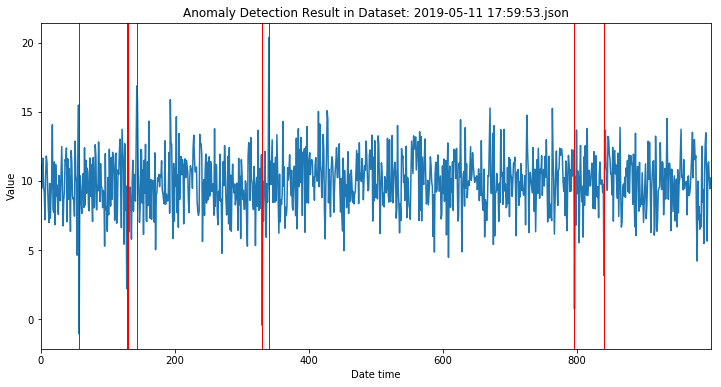

In [31]:
data_vis.plot(y='value', figsize=(12,6))
for i in true_:
    plt.axvline(x=i, linewidth = 1, color = 'r')
plt.xlabel('Date time')
plt.ylabel('Value')
plt.title('Anomaly Detection Result in Dataset: %s' %data_vis.name)